# PS4_1 
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. 

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals

In [54]:
#读取文件，并把震级排序（降序），取前50行。
df = pd.read_csv('usgs_earthquakes.csv')
Mag=df.sort_values(by='mag',ascending=False).head(50)

In [55]:
#使用罗宾森投影（伪圆柱投影）
proj = ccrs.Robinson(central_longitude=180)

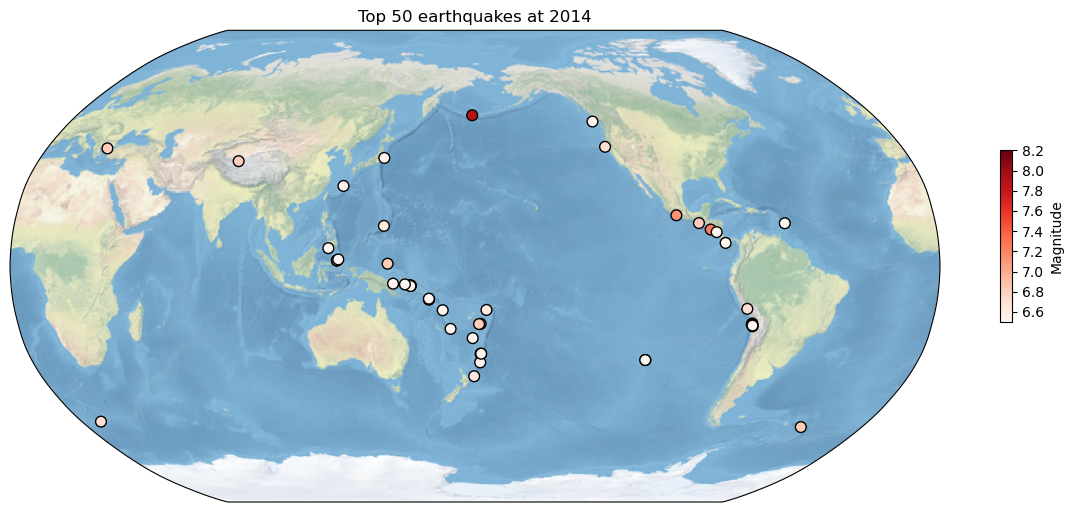

In [57]:
#创建一个新画布,向地图中添加标准图像，再把投影、经纬度等加进来
fig = plt.figure(figsize=(12, 12),dpi=100)
ax = fig.add_subplot(projection=ccrs.Robinson(central_longitude = 180))
ax.set_global()
ax.stock_img()
lon=Mag.longitude
lat=Mag.latitude
plt.title('Top 50 earthquakes at 2014')
sc=ax.scatter(lon,lat,c=Mag.mag,s=60,vmin=6.6, vmax=8.2,cmap='Reds',edgecolors='k',transform=ccrs.PlateCarree())

#设置轴的形状、位置、颜色等（龚国庆向我解释了此处）
pos = ax.get_position()
cax = fig.add_axes([pos.xmax+0.05, pos.ymin+0.15,0.01,(pos.ymax-pos.ymin-0.25)])
cbar = mpl.colorbar.ColorbarBase(cax,cmap=plt.cm.get_cmap('Reds'),norm=mpl.colors.Normalize(6.5,8.2),
                                 ticks=list(np.linspace(6.6, 8.2, 9)),orientation='vertical')

cbar.ax.set_ylabel('Magnitude')
plt.show()

#  Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

## 2.1 Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [18]:
ds=xr.open_dataset('air.sig995.2012.nc')


C:\Users\WANG\anaconda3\lib\site-packages\xarray\coding\times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


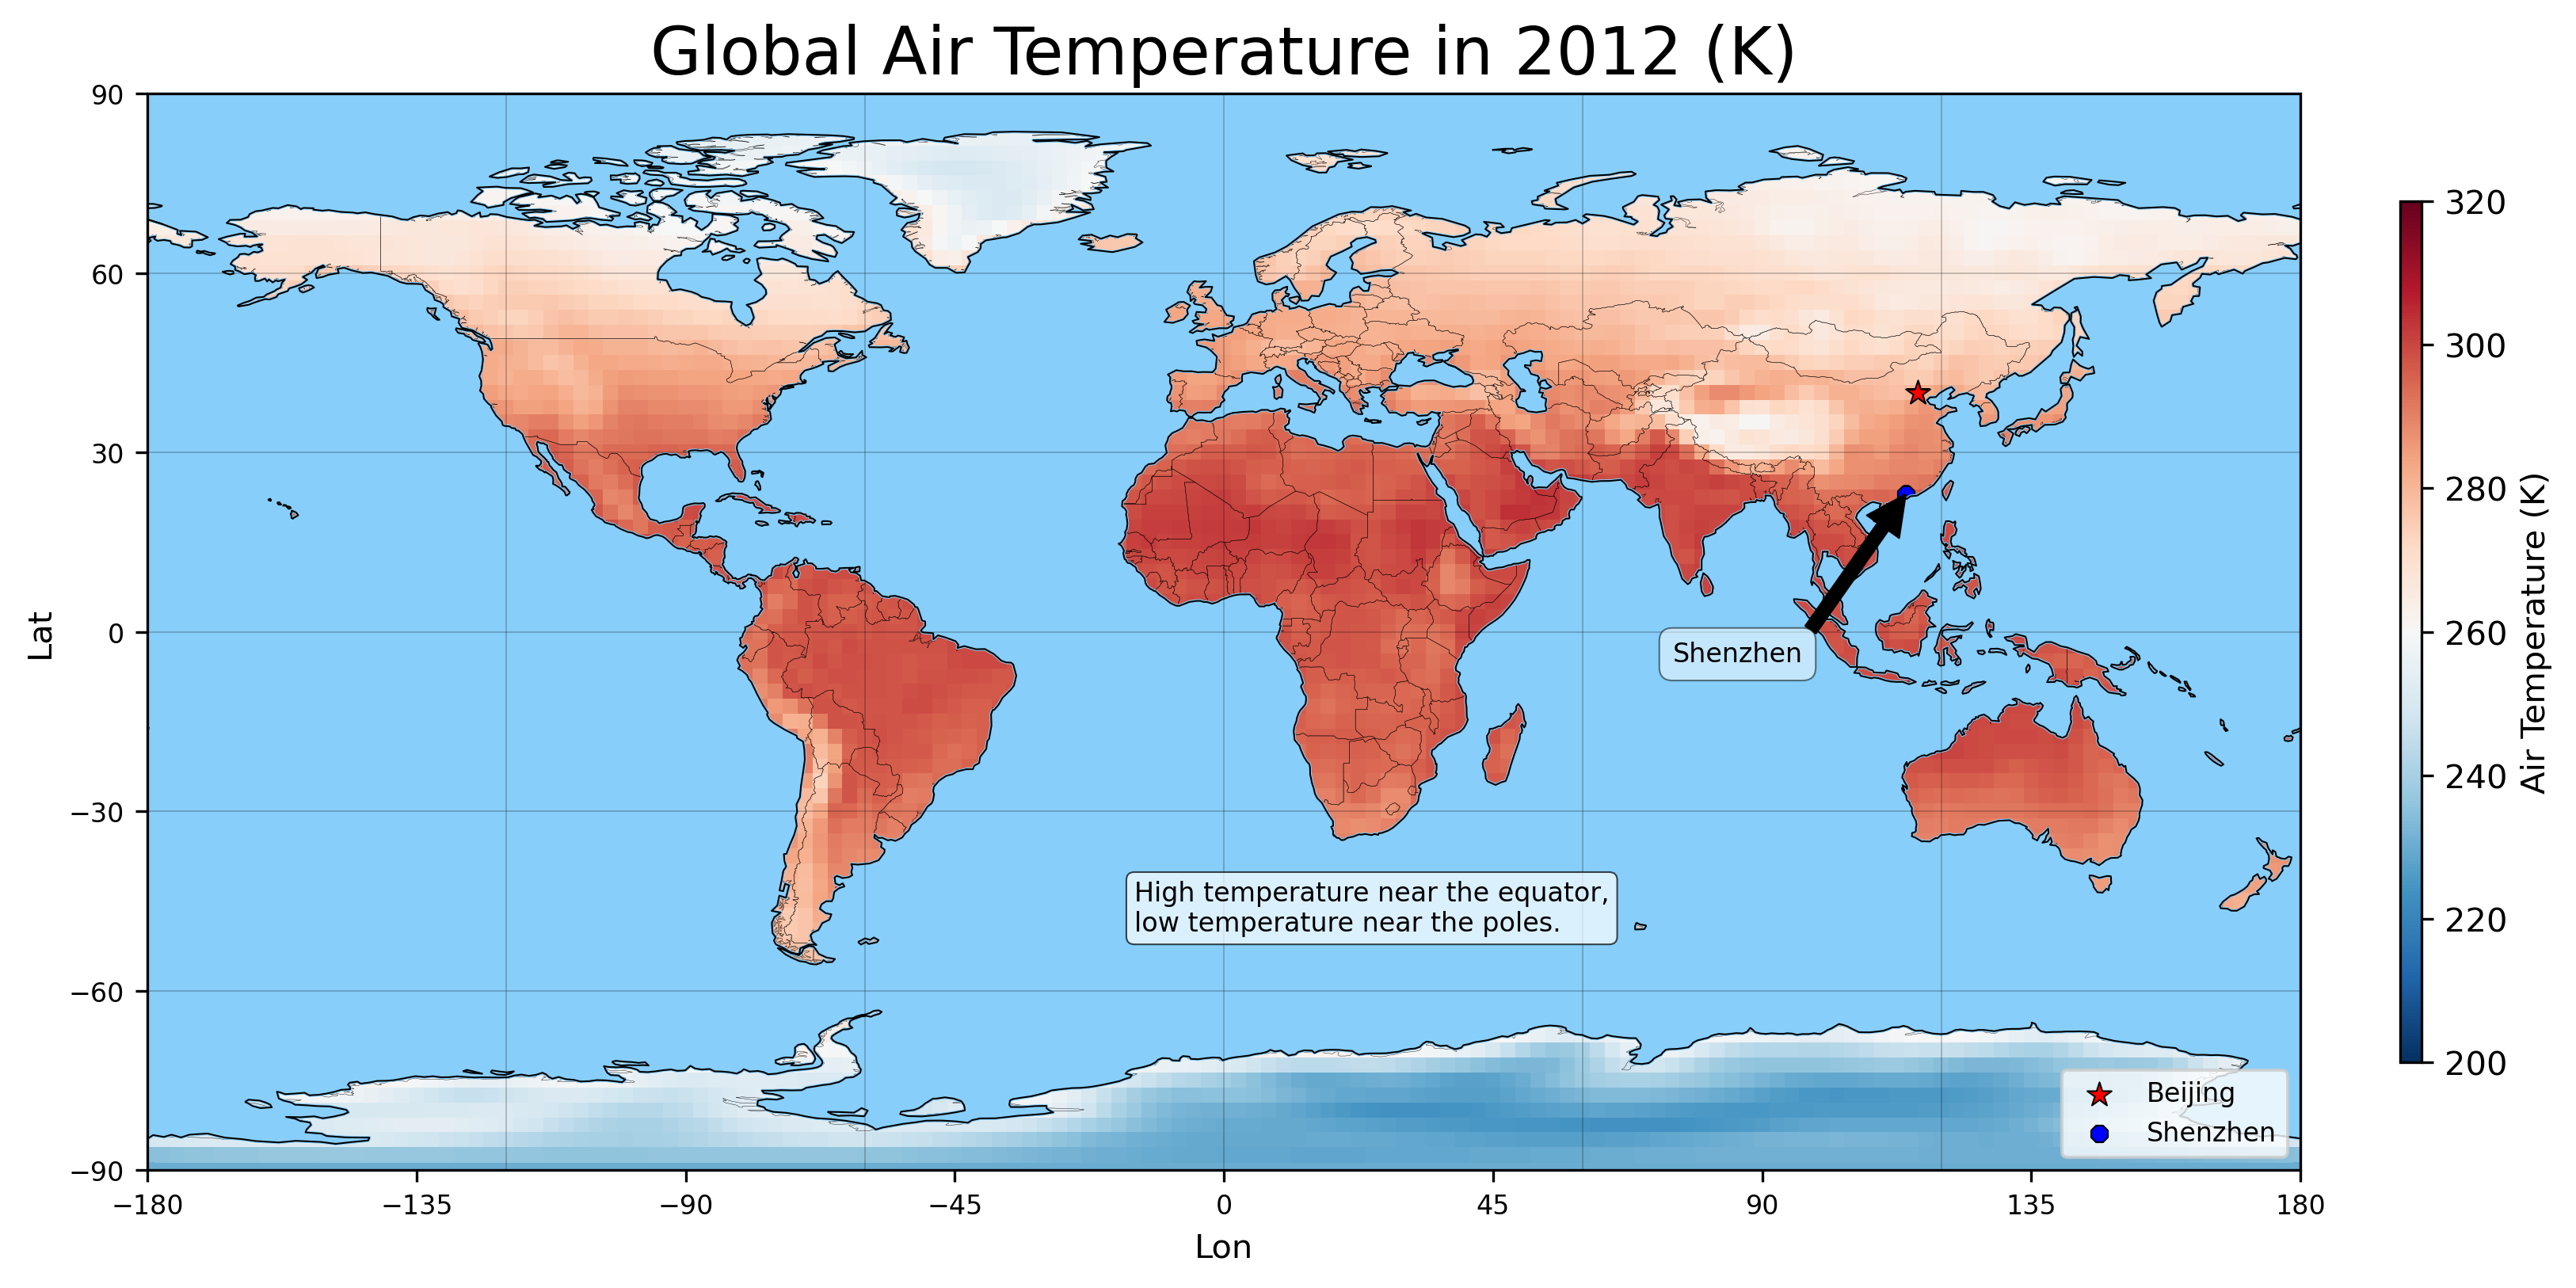

In [144]:
plt.figure(figsize=(18,6),dpi=300)
# make a projection and creat a Natural Earth dataset
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1))
# colorbar
ds.air.mean('time').plot(transform=ccrs.PlateCarree(),zorder=0,cmap='RdBu_r',vmin=200,vmax=320,add_colorbar=True,
                         cbar_kwargs={'shrink':0.8,'pad':0.03,'aspect':40,'label':'Air Temperature (K)'})

# x label and tick
ax.tick_params(labelsize=8)
ax.set_xticks(np.linspace(-180, 180, 9))
ax.set_xlabel('Lon',fontsize=10)

# y label and tick
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('Lat',fontsize=10)

# title
ax.set_title("Global Air Temperature in 2012 (K)",fontsize=20)

# gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.1, color='black', alpha=1)

# legend
ax.scatter(116,40,s=60,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5)
ax.scatter(114,23,s=30,c='b',marker='8',label='Shenzhen',edgecolors='k', linewidths=0.5)
ax.legend(loc='lower right',fontsize=8)

# masks
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue',zorder=1)
ax.add_feature(cfeature.COASTLINE,linewidth=0.5,zorder=2)

# annotate(Shenzhen)
ax.annotate('Shenzhen',xy=(114,23),xytext=(75,-5),fontsize=8,arrowprops=dict(lw=0.5,color='k'),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black',lw=0.5 ,alpha=0.5))

# text box
ax.text(-15,-50,'High temperature near the equator,\nlow temperature near the poles.',
         fontsize=8,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))

plt.show()

## 2.2 Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

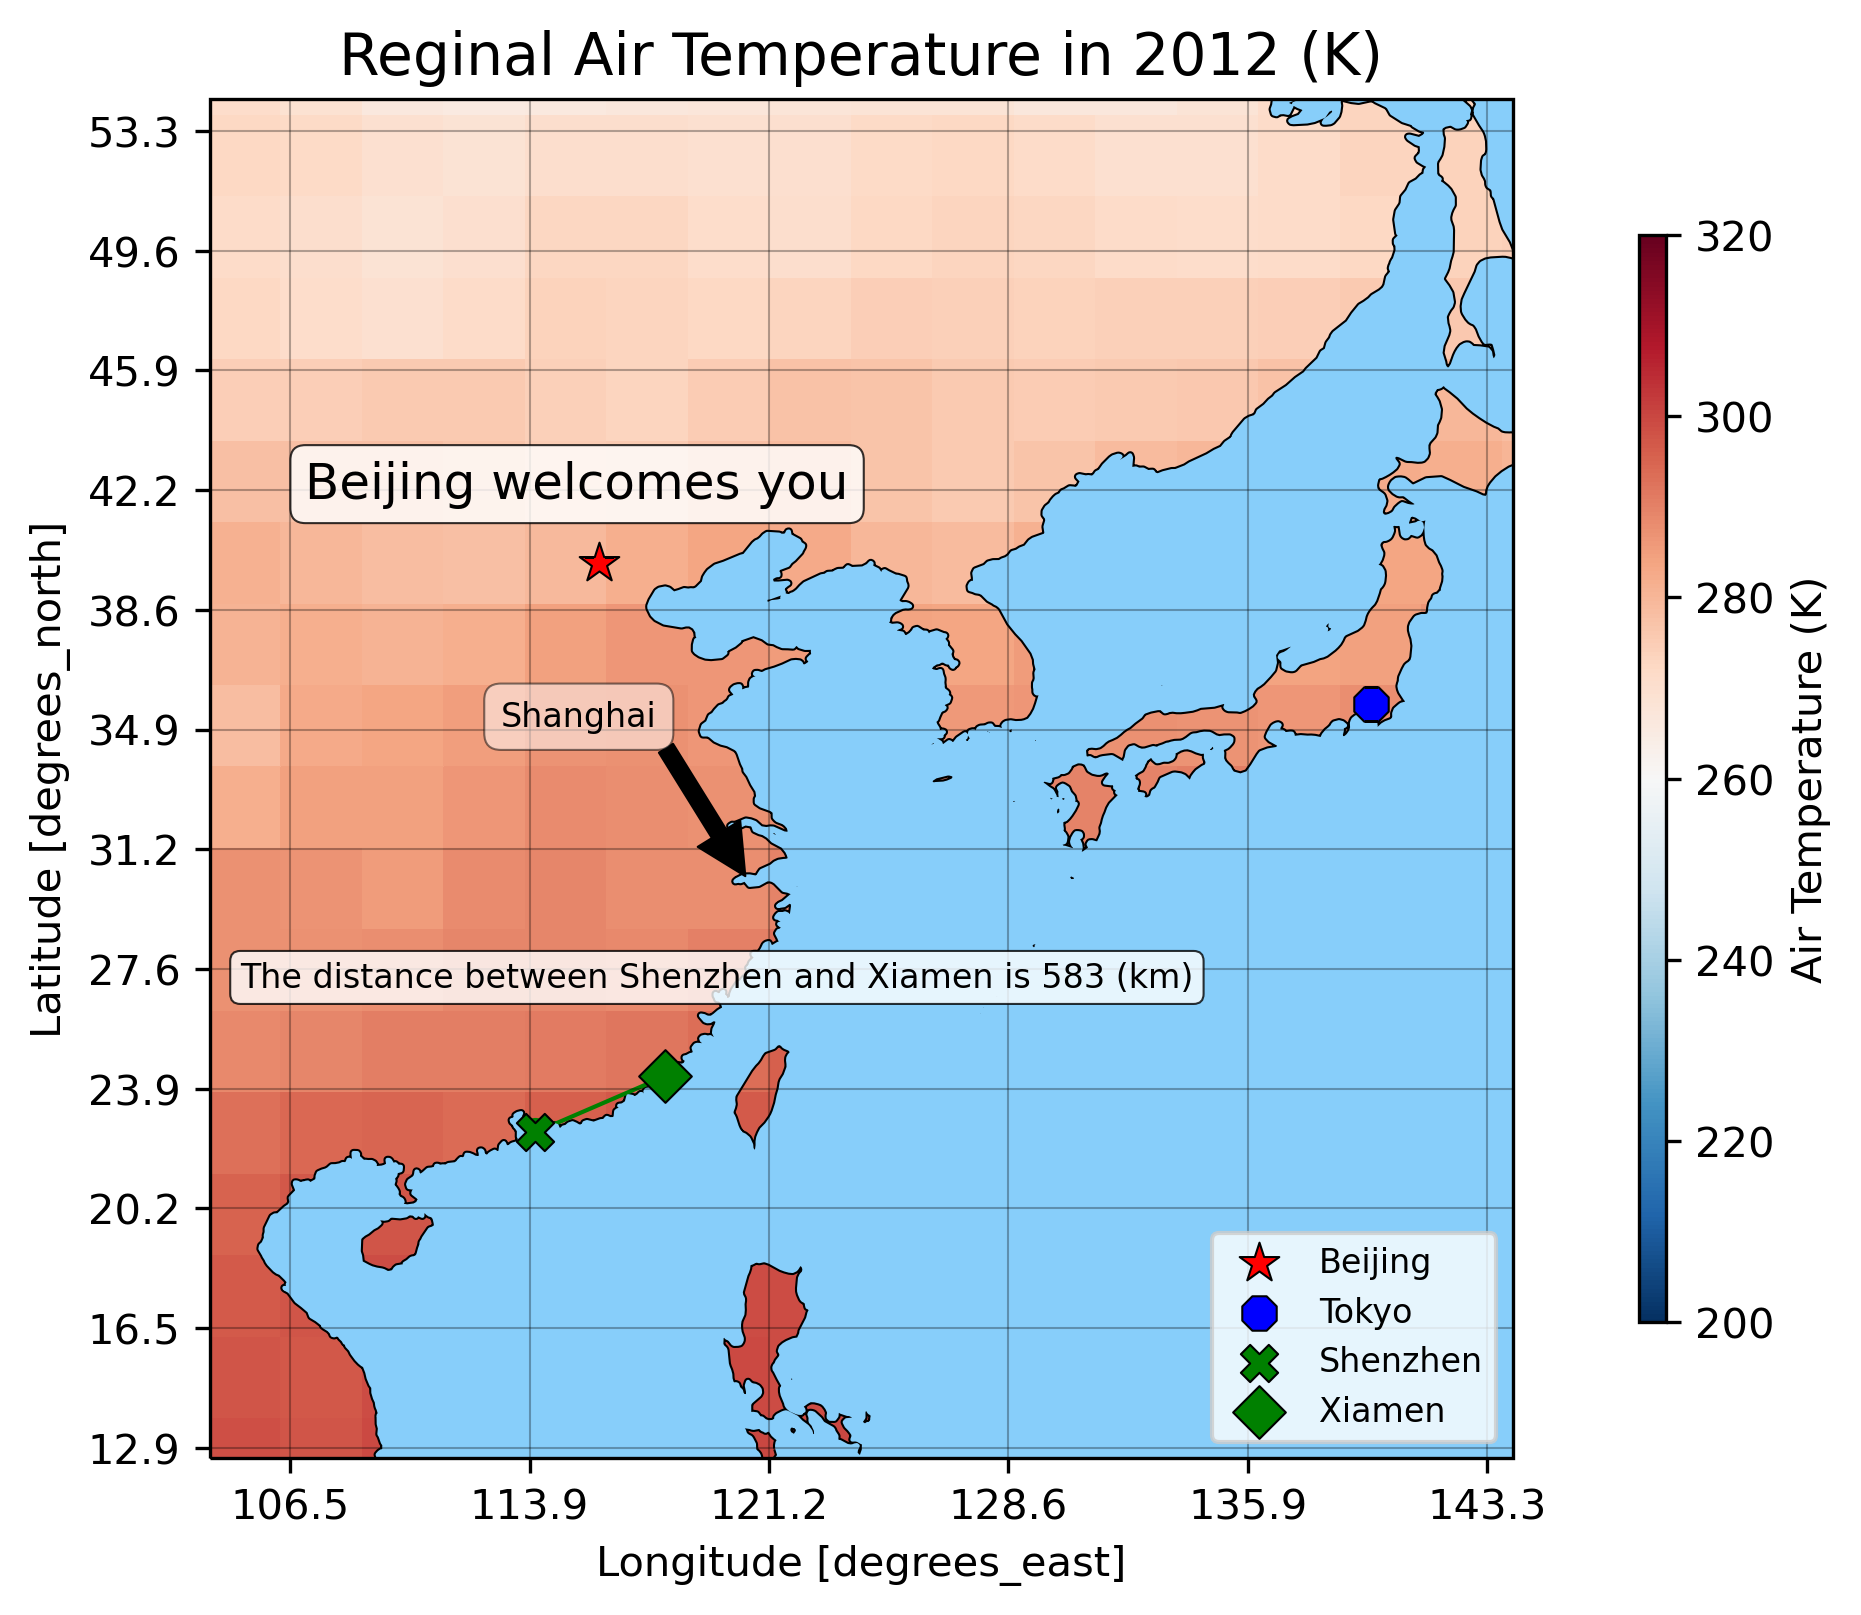

In [142]:
# Create and define the size of a figure object 
plt.figure(figsize=(18,6), dpi=300)
shenzhen_lon, shenzhen_lat = 114.06, 22.54 

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,50)),ylocs=list(np.linspace(-90,90,50)),
                  linewidth=0.5, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 50))
ax.set_xlabel('Longitude [degree_east]',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 50))
ax.set_xlabel('latitude [degree_north]',fontsize=10)

# plot air temperature and colorbar
ds.air.mean('time').plot(transform=ccrs.PlateCarree(),zorder=0,cmap='RdBu_r',vmin=200,vmax=320,
            add_colorbar=True,cbar_kwargs={'shrink':0.8,'pad':0.03,'aspect':40,'label':'Air Temperature (K)'})

# set extent area
extent = [shenzhen_lon-10, shenzhen_lon+30, shenzhen_lat-10, shenzhen_lat+30]
ax.set_extent(extent)

# feature and mask
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue', zorder=2)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=2)

# annotate
ax.annotate('Shanghai',xy=(120.5,30.4),xytext=(113,35),fontsize=8,arrowprops=dict(lw=0.5,color='k'),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black',lw=0.5 ,alpha=0.5))

# legend
ax.scatter(116,40,s=100,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5,zorder=5)
ax.scatter(139.69,35.69,s=80,c='b',marker='8',label='Tokyo',edgecolors='k', linewidths=0.5,zorder=3)
ax.scatter(114.06,22.54,s=80,c='g',marker='X',label='Shenzhen',edgecolors='k', linewidths=0.5,zorder=4)
ax.scatter(118.04,24.26,s=80,c='g',marker='D',label='Xiamen',edgecolors='k', linewidths=0.5,zorder=6)
ax.legend(loc='lower right',fontsize=8)

# text box
ax.text(107,42,'Beijing welcomes you',c='k',fontsize=12,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.8))
ax.text(105,27,'The distance between Shenzhen and Xiamen is 583 (km)',c='k',fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.8))
# title
ax.set_title("Reginal Air Temperature in 2012 (K)",fontsize=14)

# furether more
Shenzhen = dict(lon=114.06, lat=22.54)
Xiamen = dict(lon=118.04, lat=24.26)
lons = [Shenzhen['lon'],Xiamen['lon']]
lats = [Shenzhen['lat'],Xiamen['lat']]
ax.plot(lons, lats, 'go-',lw=1, transform=ccrs.PlateCarree())

plt.show()